In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import* 
from sklearn.metrics import*
from sklearn.linear_model import*

In [54]:
df = pd.read_csv(r"C:\Users\Musa\customer_churn_data.csv")

df.head()


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [55]:
df.info

<bound method DataFrame.info of      CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0             1   49    Male       4           88.35  Month-to-Month   
1             2   43    Male       0           36.67  Month-to-Month   
2             3   51  Female       2           63.79  Month-to-Month   
3             4   60  Female       8          102.34        One-Year   
4             5   42    Male      32           69.01  Month-to-Month   
..          ...  ...     ...     ...             ...             ...   
995         996   42    Male      41           37.14  Month-to-Month   
996         997   62    Male       9           80.93  Month-to-Month   
997         998   51  Female      15          111.72  Month-to-Month   
998         999   39    Male      68           65.67        One-Year   
999        1000   50    Male       1           56.67  Month-to-Month   

    InternetService  TotalCharges TechSupport Churn  
0       Fiber Optic        353.40         Yes   Y

In [56]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [57]:
df.isna()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,True,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,True,False,False,False


In [58]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [59]:
df = df.dropna()
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes


In [60]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes


In [61]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes
10,11,40,Female,1,63.53,Month-to-Month,Fiber Optic,63.53,Yes,Yes
11,12,40,Female,19,36.18,One-Year,Fiber Optic,687.42,Yes,No
14,15,27,Male,14,95.05,Month-to-Month,Fiber Optic,1330.70,Yes,Yes


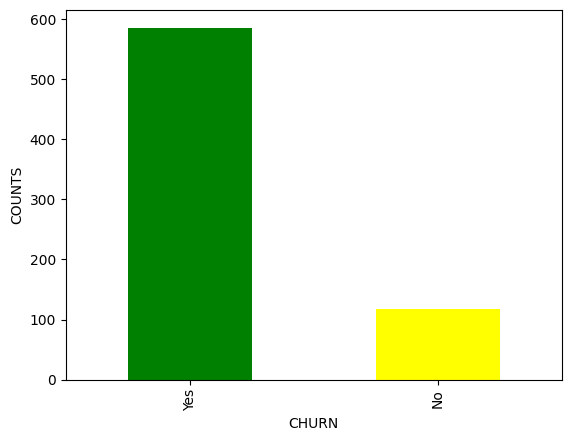

In [62]:
colors = ["green","yellow"]
df["Churn"].value_counts().plot(kind="bar",color = colors)
plt.xlabel("CHURN")
plt.ylabel("COUNTS")
plt.show()

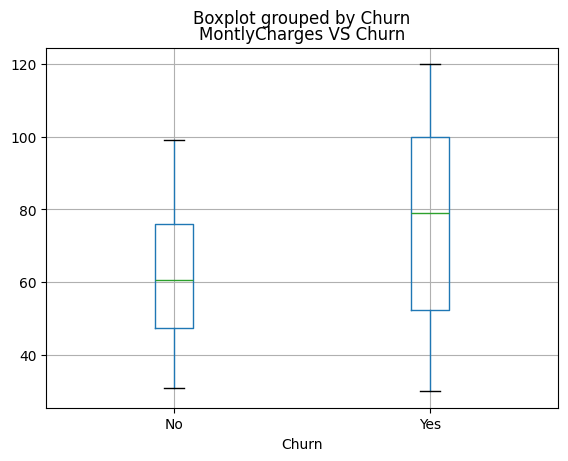

In [63]:
df.boxplot(column = "MonthlyCharges", by = "Churn")
plt.title("MontlyCharges VS Churn")
plt.show()

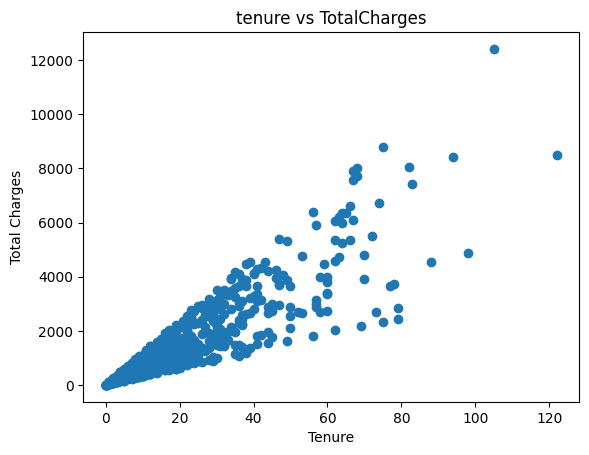

In [64]:
tenure = df["Tenure"]
totalcharges = df["TotalCharges"]
plt.scatter(tenure, totalcharges)
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.title("tenure vs TotalCharges")
plt.show()

In [65]:
df["Gender"] = df["Gender"].replace({"Male":1 ,"Female":0})
df["TechSupport"] = df["TechSupport"].replace({"Yes":1 , "No":0})
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})
df.head()

C:\Users\Musa\AppData\Local\Temp\ipykernel_8496\1021997712.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male":1 ,"Female":0})
C:\Users\Musa\AppData\Local\Temp\ipykernel_8496\1021997712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].replace({"Male":1 ,"Female":0})
C:\Users\Musa\AppData\Local\Temp\ipykernel_8496\1021997712.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,Month-to-Month,Fiber Optic,353.40,1,1
1,2,43,1,0,36.67,Month-to-Month,Fiber Optic,0.00,1,1
2,3,51,0,2,63.79,Month-to-Month,Fiber Optic,127.58,0,1
3,4,60,0,8,102.34,One-Year,DSL,818.72,1,1
5,6,42,0,16,119.75,Two-Year,DSL,1916.00,1,1


In [66]:
# Now we want to find Outliers in our datasets
Q1 = df["MonthlyCharges"].quantile(0.25)
Q3 = df["MonthlyCharges"].quantile(0.75)
IQR = Q3 - Q1
f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}'

'Q1 = 51.07, Q3 = 95.775, IQR = 44.705000000000005'

In [67]:
df = df[(df["MonthlyCharges"] >= Q1 - 1.5 * IQR) & (df["MonthlyCharges"] <= Q3 + 1.5 * IQR)]

In [68]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,Month-to-Month,Fiber Optic,353.40,1,1
1,2,43,1,0,36.67,Month-to-Month,Fiber Optic,0.00,1,1
2,3,51,0,2,63.79,Month-to-Month,Fiber Optic,127.58,0,1
3,4,60,0,8,102.34,One-Year,DSL,818.72,1,1
5,6,42,0,16,119.75,Two-Year,DSL,1916.00,1,1
...,...,...,...,...,...,...,...,...,...,...
991,992,24,1,32,81.93,Month-to-Month,Fiber Optic,2621.76,1,1
993,994,38,1,4,102.27,One-Year,Fiber Optic,409.08,0,1
994,995,34,0,1,78.63,Month-to-Month,DSL,78.63,0,1
995,996,42,1,41,37.14,Month-to-Month,Fiber Optic,1522.74,1,1


In [69]:
Q1 = df["TotalCharges"].quantile(0.25)
Q3 = df["TotalCharges"].quantile(0.75)
IQR = Q3 - Q1
df = df[
    (df["TotalCharges"] >= Q1 - 1.5 * IQR) & (df["TotalCharges"] <= Q3 + 1.5 * IQR)]
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,Month-to-Month,Fiber Optic,353.40,1,1
1,2,43,1,0,36.67,Month-to-Month,Fiber Optic,0.00,1,1
2,3,51,0,2,63.79,Month-to-Month,Fiber Optic,127.58,0,1
3,4,60,0,8,102.34,One-Year,DSL,818.72,1,1
5,6,42,0,16,119.75,Two-Year,DSL,1916.00,1,1
...,...,...,...,...,...,...,...,...,...,...
991,992,24,1,32,81.93,Month-to-Month,Fiber Optic,2621.76,1,1
993,994,38,1,4,102.27,One-Year,Fiber Optic,409.08,0,1
994,995,34,0,1,78.63,Month-to-Month,DSL,78.63,0,1
995,996,42,1,41,37.14,Month-to-Month,Fiber Optic,1522.74,1,1


In [70]:
Q1 = df["Tenure"].quantile(0.25)
Q3 = df["Tenure"].quantile(0.75)
IQR = Q3 - Q1
df = df[
    (df["Tenure"] >= Q1 - 1.5 * IQR) & (df["Tenure"] <= Q3 + 1.5 * IQR)]
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,Month-to-Month,Fiber Optic,353.40,1,1
1,2,43,1,0,36.67,Month-to-Month,Fiber Optic,0.00,1,1
2,3,51,0,2,63.79,Month-to-Month,Fiber Optic,127.58,0,1
3,4,60,0,8,102.34,One-Year,DSL,818.72,1,1
5,6,42,0,16,119.75,Two-Year,DSL,1916.00,1,1
...,...,...,...,...,...,...,...,...,...,...
991,992,24,1,32,81.93,Month-to-Month,Fiber Optic,2621.76,1,1
993,994,38,1,4,102.27,One-Year,Fiber Optic,409.08,0,1
994,995,34,0,1,78.63,Month-to-Month,DSL,78.63,0,1
995,996,42,1,41,37.14,Month-to-Month,Fiber Optic,1522.74,1,1


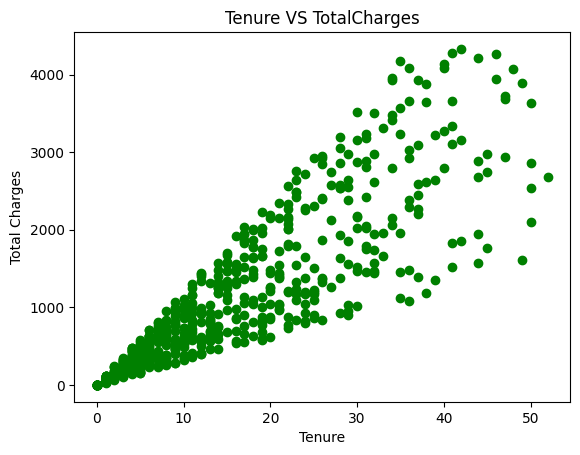

In [71]:
plt.scatter(df['Tenure'],df['TotalCharges'], color ='green')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Tenure VS TotalCharges')
plt.show()

In [72]:
cols = ["ContractType", "InternetService"]

cols = [c for c in cols if c in df.columns]
df = pd.get_dummies(df,columns=cols,drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,TechSupport,Churn,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic
0,1,49,1,4,88.35,353.40,1,1,0,0,1
1,2,43,1,0,36.67,0.00,1,1,0,0,1
2,3,51,0,2,63.79,127.58,0,1,0,0,1
3,4,60,0,8,102.34,818.72,1,1,1,0,0
5,6,42,0,16,119.75,1916.00,1,1,0,1,0


In [73]:
x = df.drop('Churn',axis = 1)
y=df['Churn']
x

,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,TechSupport,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic
0,1,49,1,4,88.35,353.40,1,0,0,1
1,2,43,1,0,36.67,0.00,1,0,0,1
2,3,51,0,2,63.79,127.58,0,0,0,1
3,4,60,0,8,102.34,818.72,1,1,0,0
5,6,42,0,16,119.75,1916.00,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
991,992,24,1,32,81.93,2621.76,1,0,0,1
993,994,38,1,4,102.27,409.08,0,1,0,1
994,995,34,0,1,78.63,78.63,0,0,0,0
995,996,42,1,41,37.14,1522.74,1,0,0,1


In [74]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)


In [81]:
# Now we use the Logistic Regression because LOGISTIC REGREESION is only use for YES or NO,
# Fake or real, Male or Famale
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [91]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

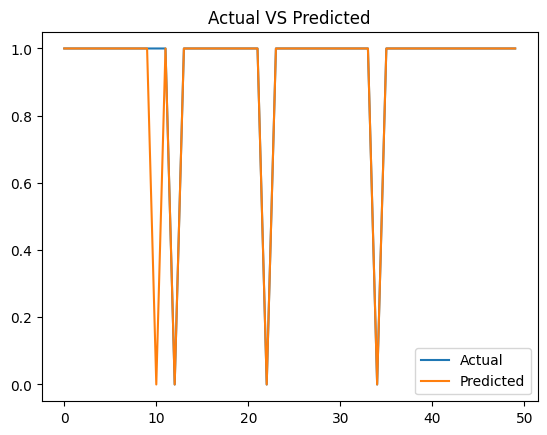

In [92]:
plt.plot(y_test.values[:50],label='Actual')
plt.plot(y_pred[:50],label='Predicted')
plt.legend()
plt.title("Actual VS Predicted")
plt.show()

In [95]:
acc_train = accuracy_score(y_train,y_pred_train)
f'Accuracy score train: {acc_train}'

'Accuracy score train: 0.9457364341085271'

In [96]:
acc_test = accuracy_score(y_test,y_pred_test)
f'Accuracy score test: {acc_test}'

'Accuracy score test: 0.9461538461538461'

In [97]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.98      0.96      0.97       115

    accuracy                           0.95       130
   macro avg       0.85      0.91      0.88       130
weighted avg       0.95      0.95      0.95       130



In [98]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82        86
           1       0.95      0.98      0.97       430

    accuracy                           0.95       516
   macro avg       0.92      0.87      0.90       516
weighted avg       0.94      0.95      0.94       516



In [103]:
# Simple confusion matrix on test data
print(confusion_matrix(y_test,y_pred_test))

[[ 13   2]
 [  5 110]]


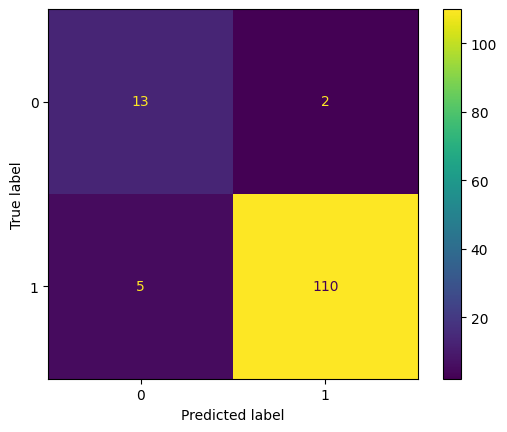

In [105]:
# griphcal confusion matrics on train data
con_mat = confusion_matrix(y_test,y_pred_test)
ConfusionMatrixDisplay(con_mat).plot()
plt.show()